In [1]:
import os
import matplotlib.pyplot as plt
from os.path import join as opj
import nibabel as nib
import numpy as np
from nilearn import image

In [2]:
from nilearn.plotting import plot_epi, plot_anat

## Manipulation with Affine transformation

In [22]:
from numpy import sin, cos, pi
np.set_printoptions(precision=2, suppress=True)

def transform(image_path, rotations=[0,0,0], translations=[0,0,0]):
    
    image_affine = nib.load(image_path).affine
    #Rotational component
    rot_X, rot_Y, rot_Z = rotations
    
    cos_X, cos_Y, cos_Z = (cos(rot_X * pi/180), cos(rot_Y * pi/180), cos(rot_Z * pi/180))
    sin_X, sin_Y, sin_Z = (sin(rot_X * pi/180), sin(rot_Y * pi/180), sin(rot_Z * pi/180))
    
    
    rotation_X = np.array([[1,    0,       0,    0],
                           [0,  cos_X,  -sin_X,  0],
                           [0,  sin_X,   cos_X,  0],
                           [0,    0,       0,    1]])

    rotation_Y = np.array([[cos_Y,  0,  -sin_Y,  0],
                           [0,      1,     0,    0],
                           [sin_Y,  0,   cos_Y,  0],
                           [0,      0,     0,    1]])

    rotation_Z = np.array([[cos_Z,  -sin_Z,   0,  0],
                           [sin_Z,   cos_Z,   0,  0],
                           [0,         0,     1,  0],
                           [0,         0,     0,  1]])
    
    #Translational component
    X, Y, Z = translations
    translation_XYZ = np.zeros((4,4))
    translation_XYZ[:,3][:3] = X, Y, Z
    
    #Total rotatoinal transformation
    rotation_total = rotation_X@rotation_Y@rotation_Z
    
    #Transformation applied to the source affine
    affine_transformed = rotation_total@image_affine + translation_XYZ
    
    #print(f' Input rotations - > {rotations}\n', 
    #      f'Input translations - > {translations} \n\n', 
    #      f'Pre transformation: \n {image_affine} \n Post transforamation: \n {affine_transformed} \n')
    
    image = nib.load(image_path)
    
    extention = '.nii'
    path_split = image_path.split('.')
    file_transformed_path = path_split[0] + '_TRANS' + extention
    
    image_transformed = nib.Nifti1Image(dataobj=image.dataobj, affine=affine_transformed, header=image.header)
    
    nib.save(image_transformed, file_transformed_path)
    
    if os.path.exists(file_transformed_path):
        return file_transformed_path
    else:
        print('No transformed file created')
    
    return file_transformed_path

In [4]:
def to_canonical(image_path):
    
    image = nib.load(image_path)
    
    extention = '.nii'
    path_split = image_path.split('.')
    file_canonical_path = path_split[0] + '_CANON' + extention
    
    nib.save(nib.as_closest_canonical(image), file_canonical_path)
    
    if os.path.exists(file_canonical_path):
        return file_canonical_path
    else:
        print('No canonical file created')

## Input data CBA

In [9]:
base_path = '/data/data/mr/dataNIK/'
CBA_029_path = opj(base_path, 'SG_T1_CBA/00000029_QuadCoilCCD_5_1_1.nii')
BTBR_18_path = opj(base_path, 'SG_T1_BTBR/00000018_QuadCoil_CCD_BTBR.nii')
path_list = [CBA_029_path, BTBR_18_path]

for path in path_list:
    if not os.path.exists(path):
        print(f'Path "{path}" does not exist')

In [10]:
CBA_029_img = nib.load(CBA_029_path)

In [12]:
CBA_029_img.affine

array([[-0.  , -0.05, -0.  , -2.56],
       [ 0.  , -0.  ,  0.5 ,  5.44],
       [-0.05,  0.  ,  0.01,  9.72],
       [ 0.  ,  0.  ,  0.  ,  1.  ]])

In [15]:
print(CBA_029_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 400 400   9   0   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1.   0.05 0.05 0.5  0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 8
slice_code      : unknown
xyzt_units      : 2
cal_max         : 17768.979
cal_min         : 30.910587
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'00000029/QuadCoilCCD/5/1'
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : -0.49550876
quatern_c       : 0.49550876
quatern_d       : 0.5044513
qoffset_x       : -2.5621989
qoffset_y    

In [8]:
CBA_029_CANON_path = to_canonical(CBA_029_path)
BTBR_18_CANON_path = to_canonical(BTBR_18_path)

## Input data Atlas 40 um

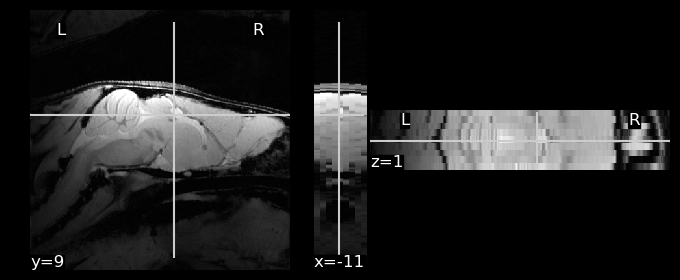

In [26]:
plot_anat(BTBR_18_CANON_path, dim=-.5)

In [17]:
SAMRI_atlas_root = '/data/data/mr/atlas/mouse-brain-templates-0.5.3/'
DSURQEC40_path = opj(SAMRI_atlas_root,'dsurqec_40micron.nii')
DSURQEC40_mask_path = opj(SAMRI_atlas_root,'dsurqec_40micron_mask.nii')
DSURQEC40_LABELS_path = opj(SAMRI_atlas_root,'dsurqec_40micron_labels.nii')

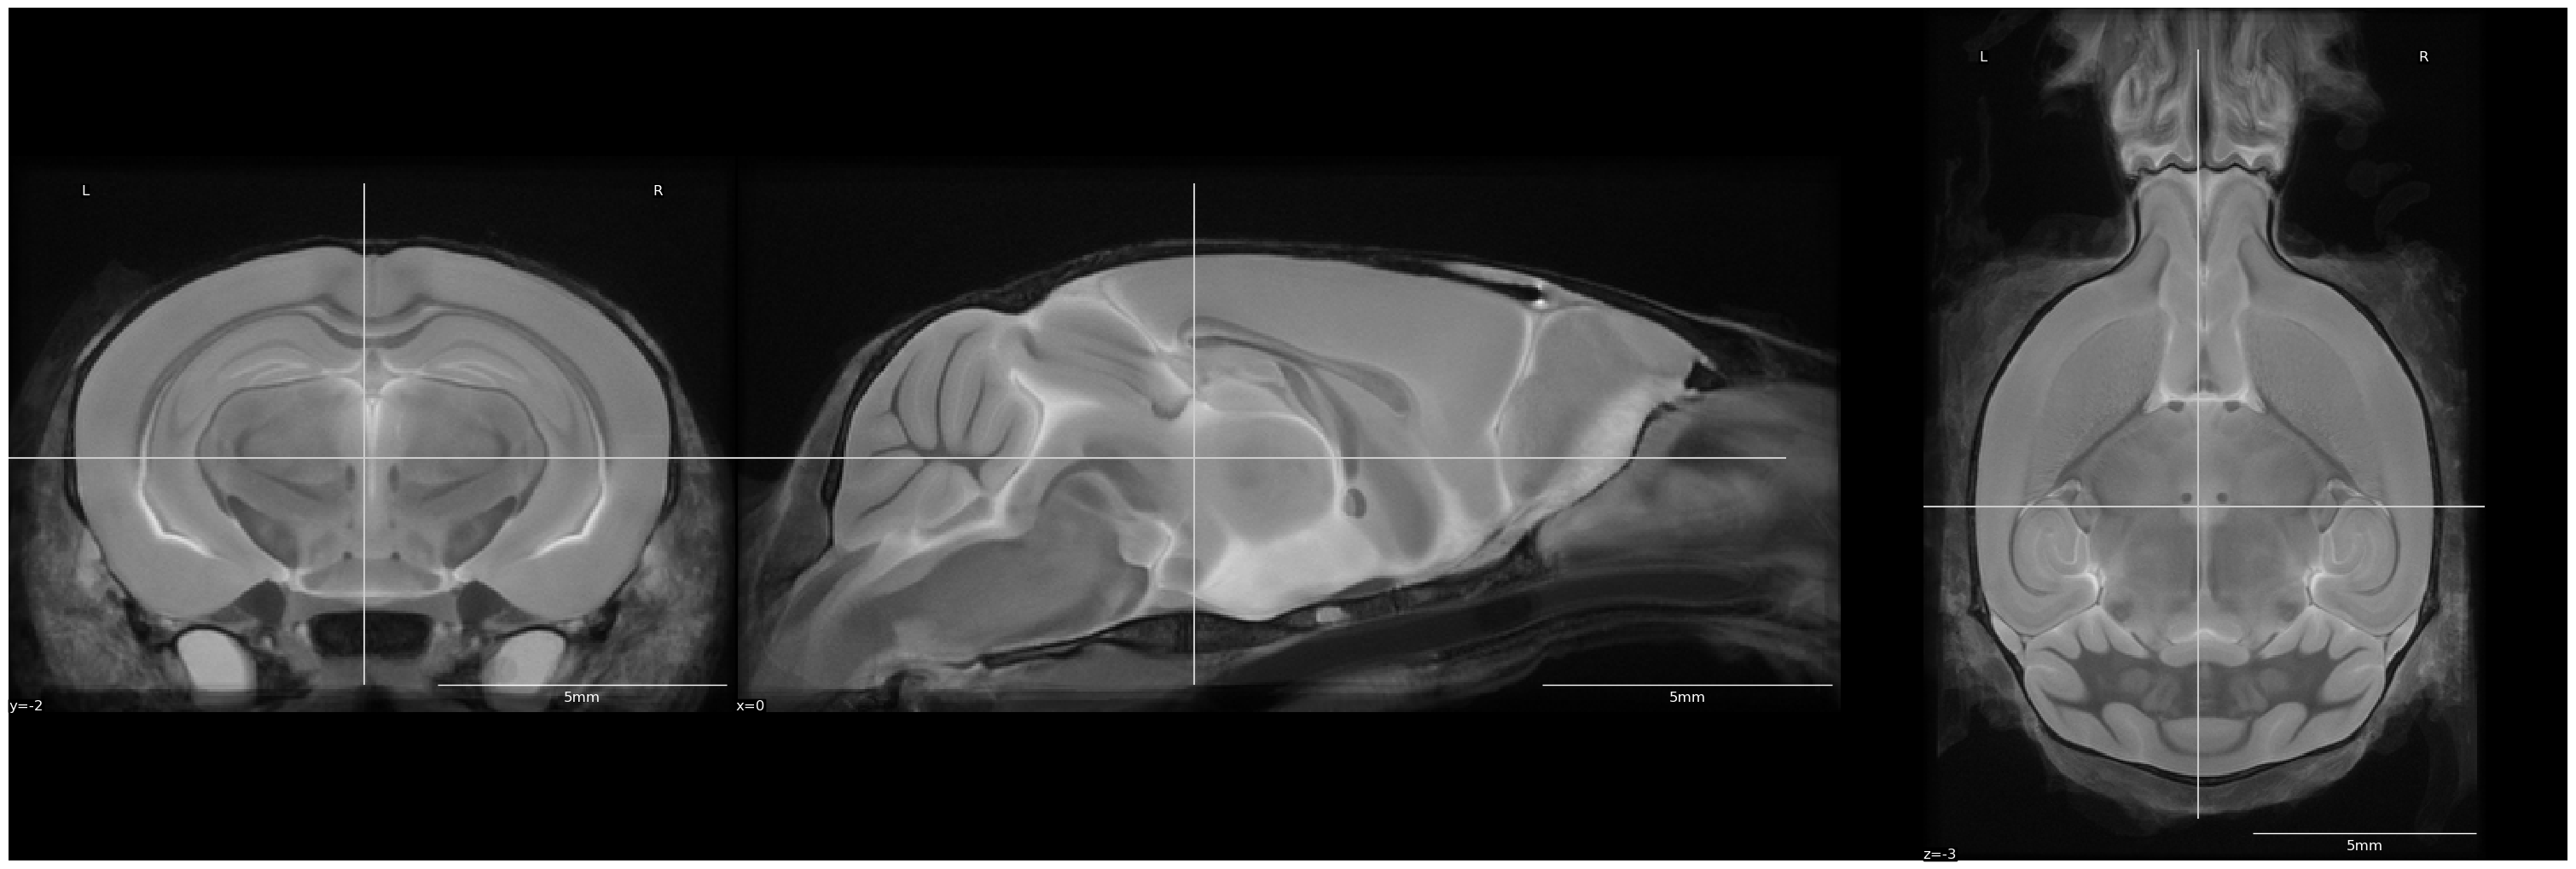

In [21]:
fig = plt.figure(figsize=(30,10))
display = plot_anat(DSURQEC40_path, display_mode='ortho', figure=fig, dim=-0.5, annotate=True)
display.annotate(scale_size=5, scale_units='mm', scalebar=True)
#display.add_contours(transform(CBA_029_CANON_path, rotations=[5, 0, 90], translations=[7.5,10,-5]))

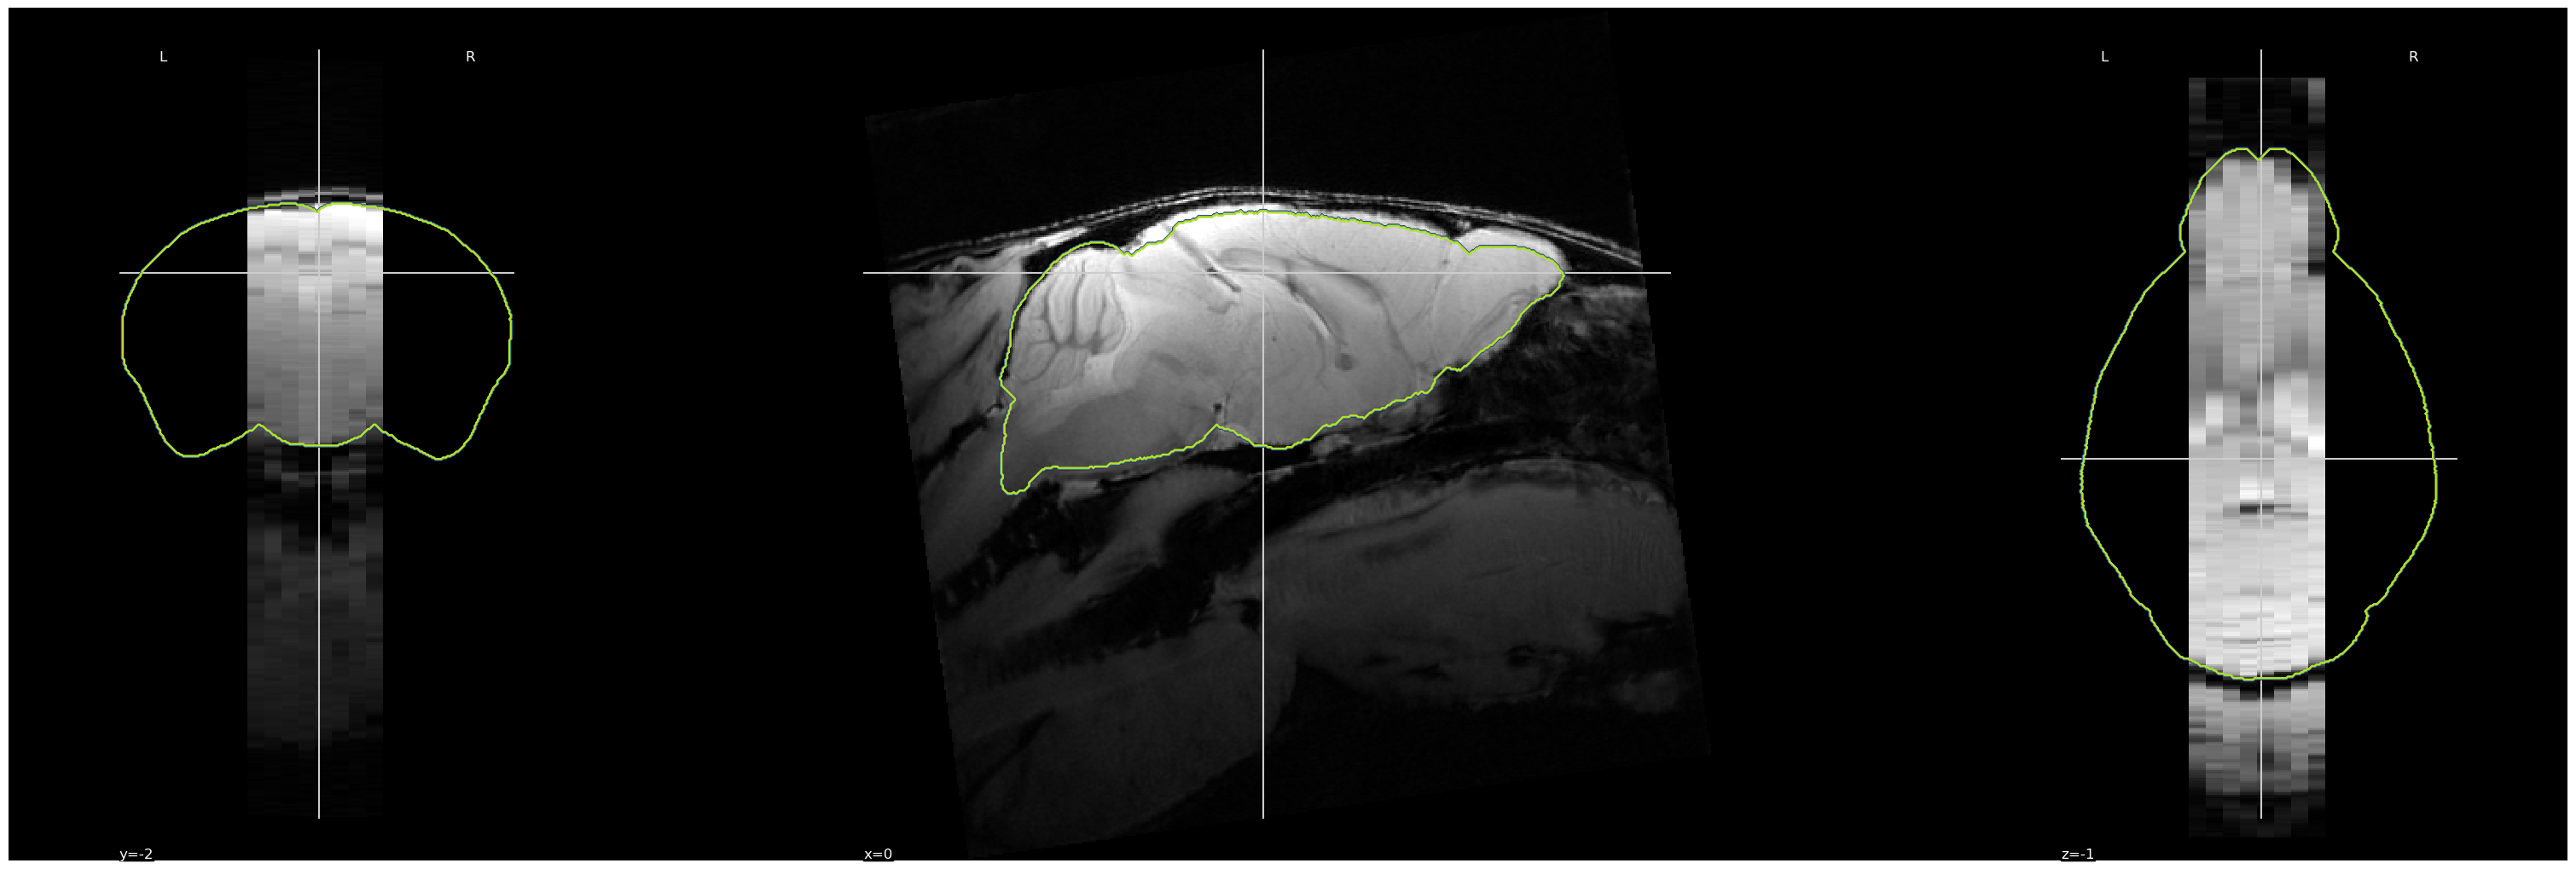

In [20]:
fig = plt.figure(figsize=(30,10))
display = plot_anat(transform(CBA_029_CANON_path, rotations=[8, 0, 90], translations=[7.5,11,-4]), display_mode='ortho', figure=fig, dim=-0.5)
display.add_contours(DSURQEC40_mask_path, alpha=1)
display.annotate(scale_size=5, scale_units='mm')

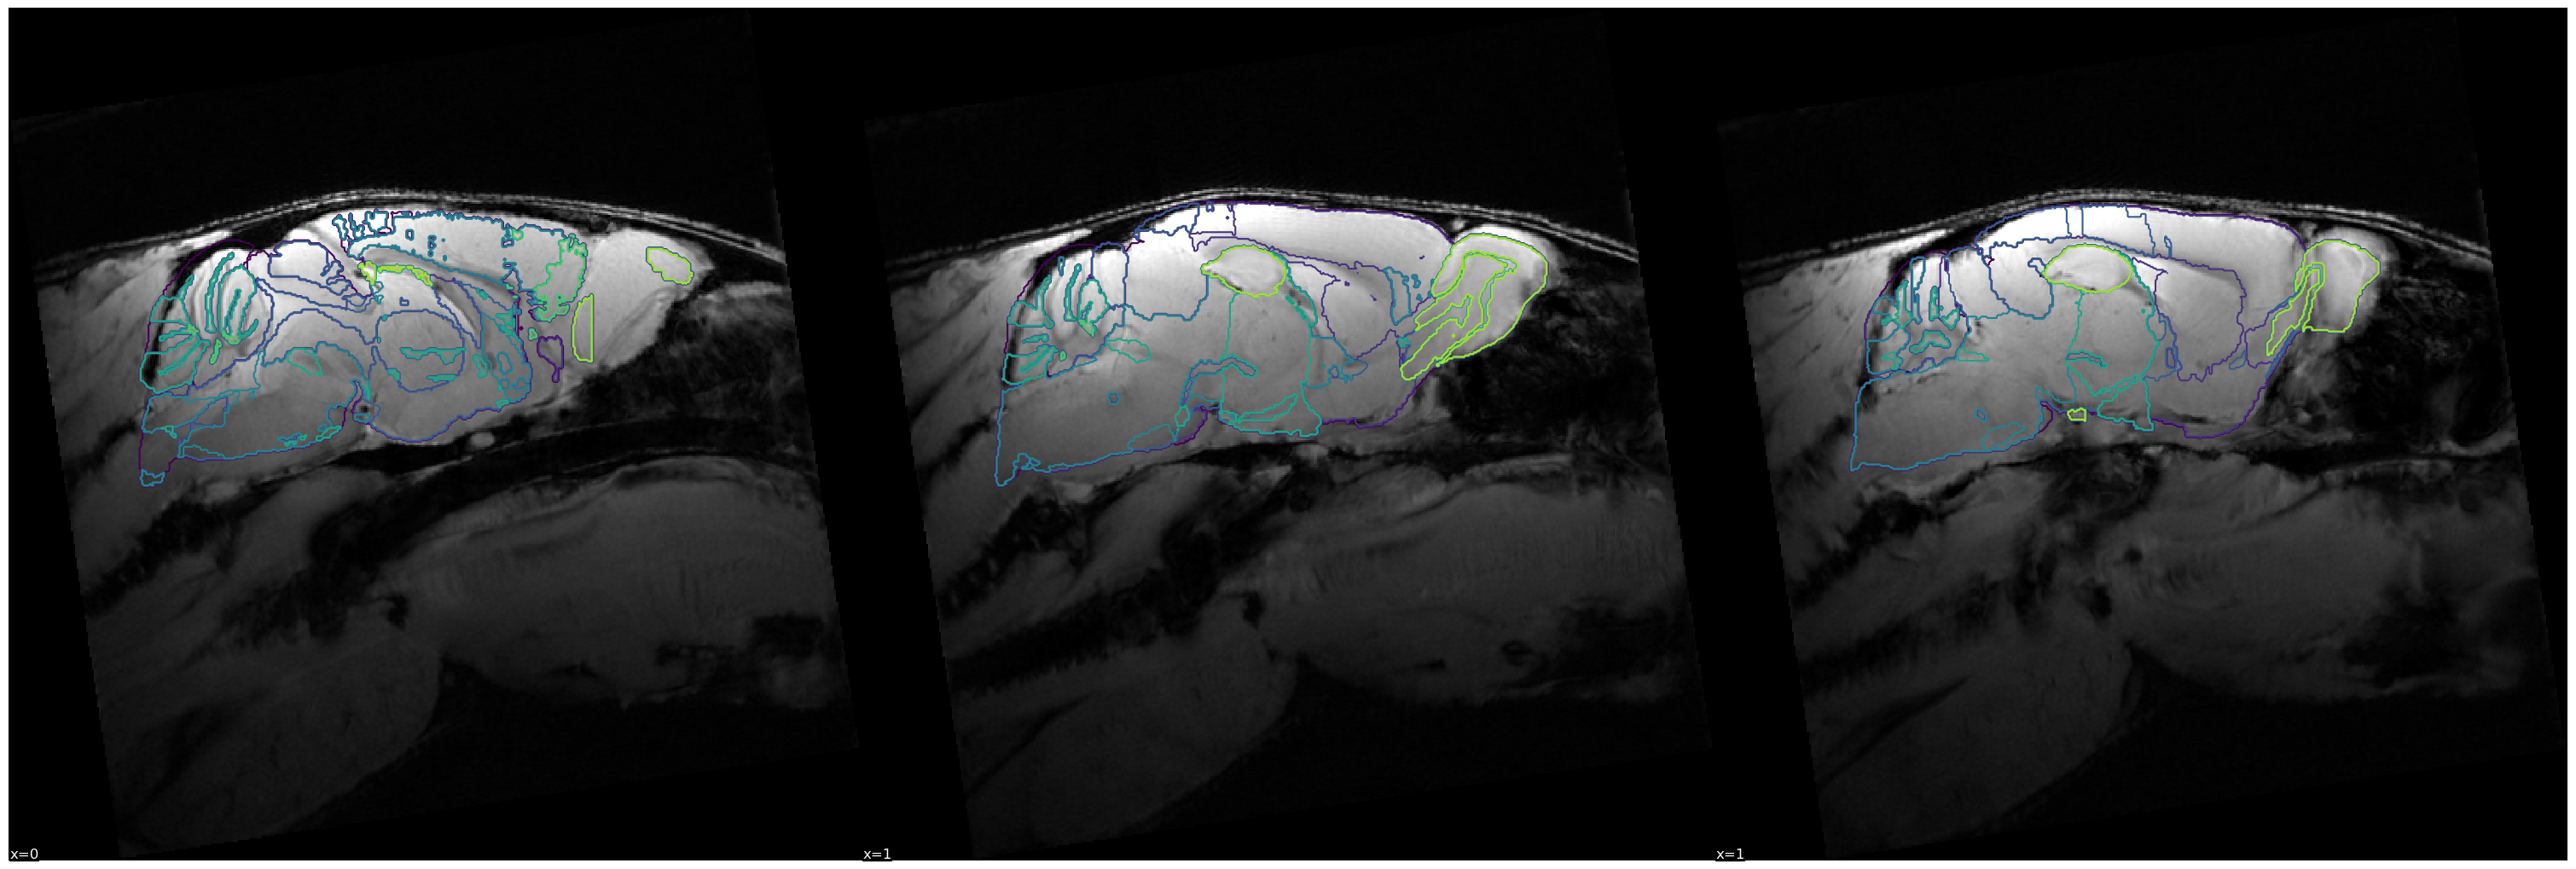

In [137]:
fig = plt.figure(figsize=(30,10))
display = plot_anat(transform(CBA_029_CANON_path, rotations=[8.5, 0, 90], translations=[8,11.3,-4]), display_mode='x', cut_coords=[0, 1, 1.5], figure=fig, dim=-.50)
display.add_contours(DSURQEC40_LABELS_path)

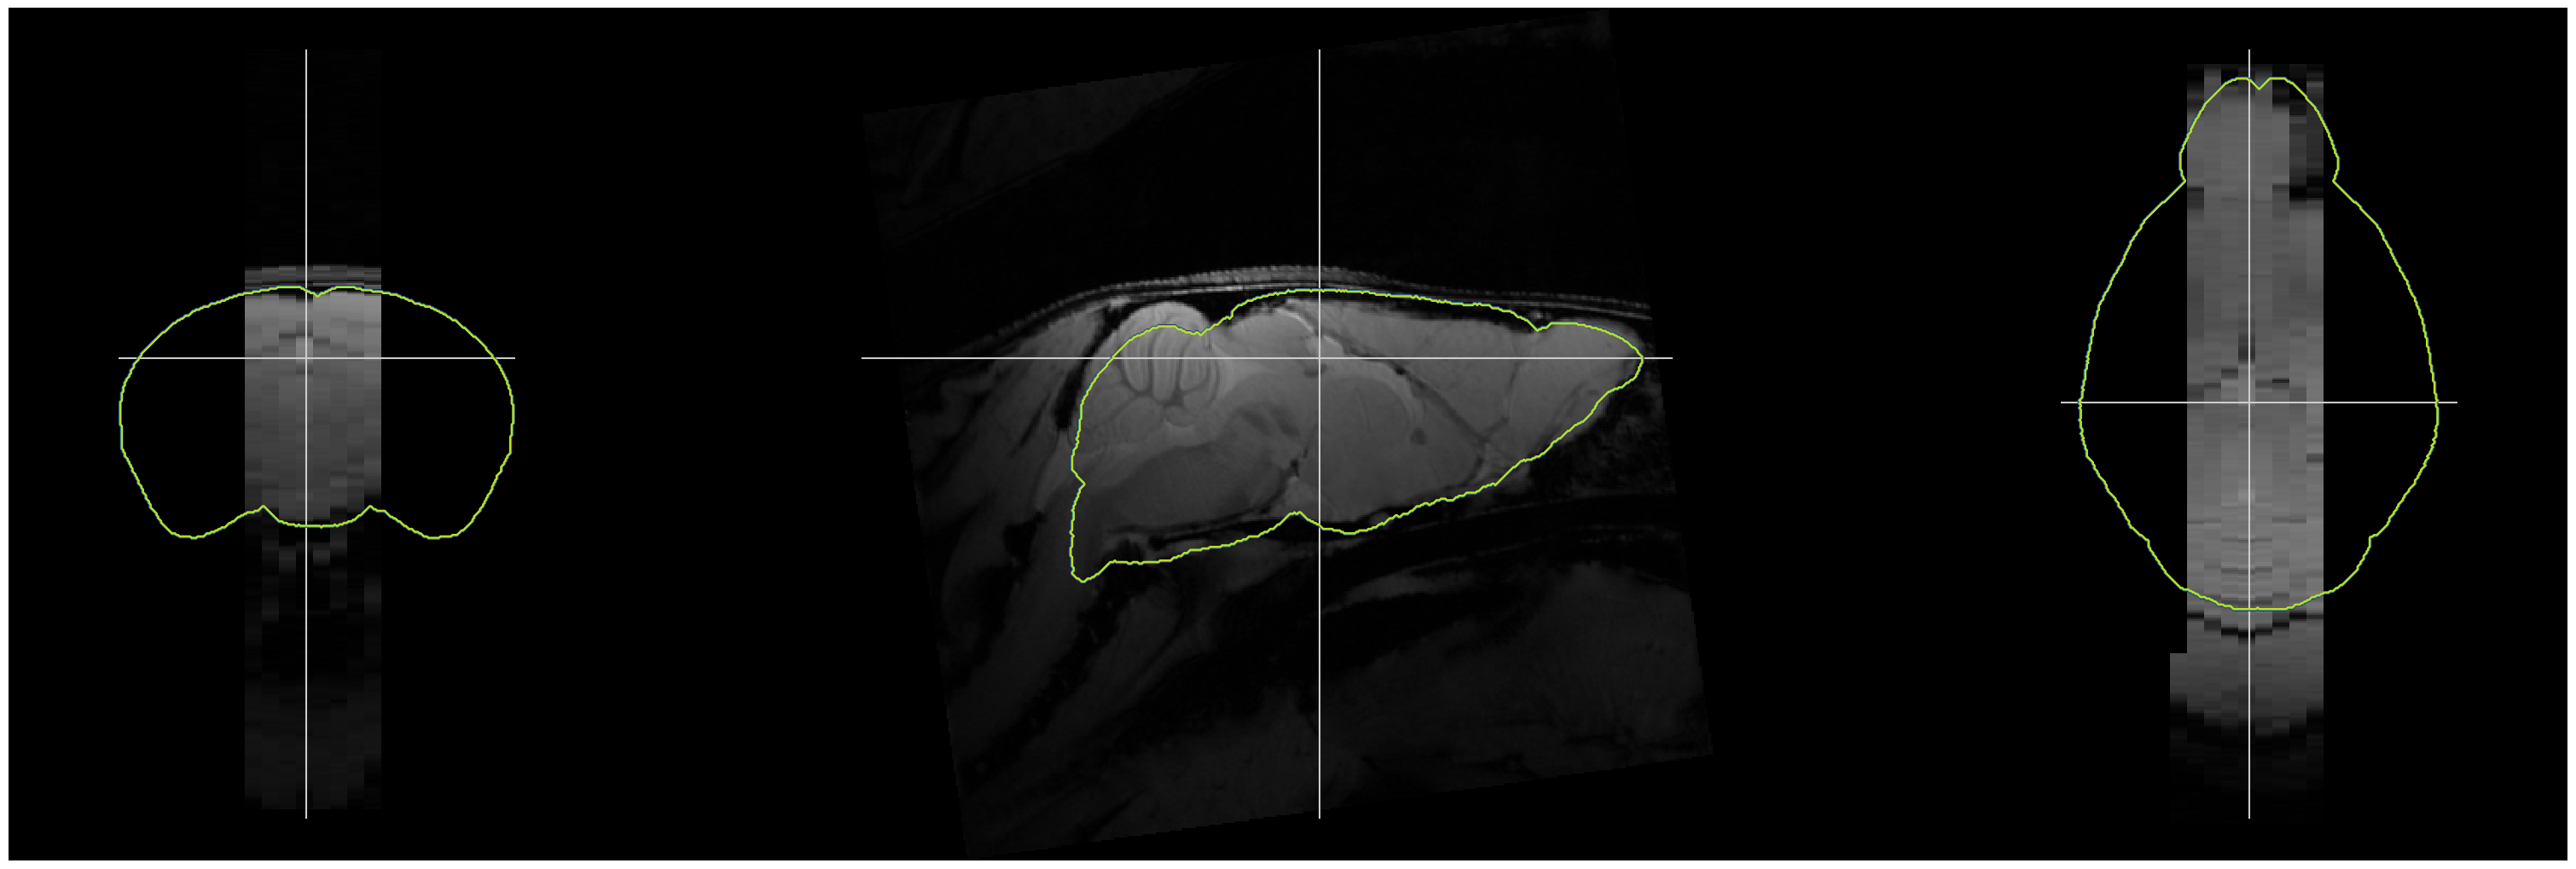

In [179]:
plt.rcParams.update({'font.size': 25})
fig = plt.figure(figsize=(30,10))
display = plot_anat(transform(BTBR_18_CANON_path, rotations=[8,0,90], translations=[9.5,8.7,-1.5]), display_mode='ortho', figure=fig, annotate=False)
display.add_contours(DSURQEC40_mask_path)
#display.add_contours(, annotate=False)
#display.annotate(scale_units='mm')

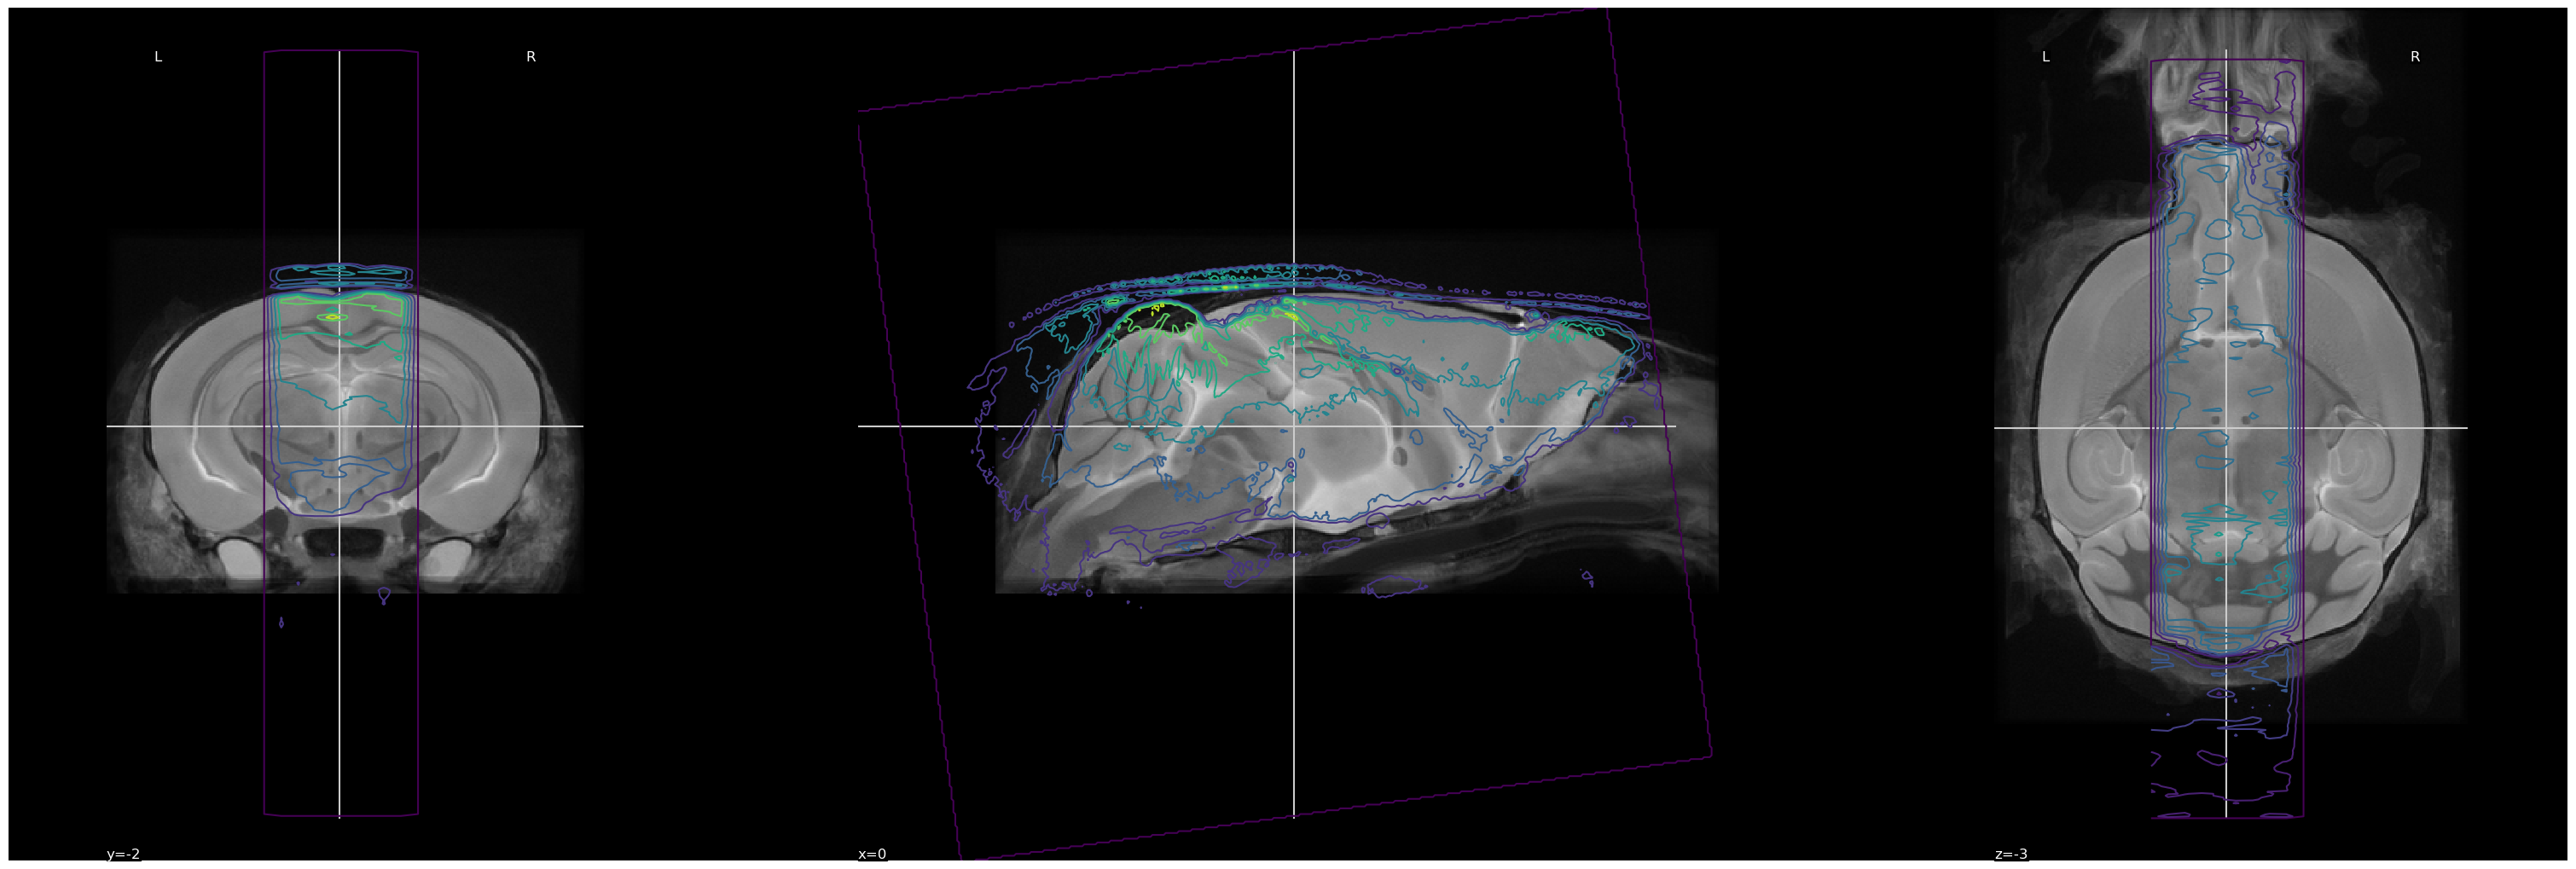

In [43]:
fig = plt.figure(figsize=(30,10))
display = plot_anat(DSURQEC40_path, display_mode='ortho', figure=fig, dim=-.5)
display.add_contours(transform(BTBR_18_CANON_path, rotations=[8, 0, 90], translations=[9.5,9,-1.5]))

In [63]:
CBA_original_img.affine

array([[-0.  , -0.05, -0.  , -2.56],
       [ 0.  , -0.  ,  0.5 ,  5.44],
       [-0.05,  0.  ,  0.01,  9.72],
       [ 0.  ,  0.  ,  0.  ,  1.  ]])

In [65]:
CBA_029_img_canon.affine

array([[  0.05,  -0.  ,   0.  , -22.51],
       [  0.  ,   0.5 ,  -0.  ,   5.79],
       [ -0.  ,   0.01,   0.05, -10.22],
       [  0.  ,   0.  ,   0.  ,   1.  ]])

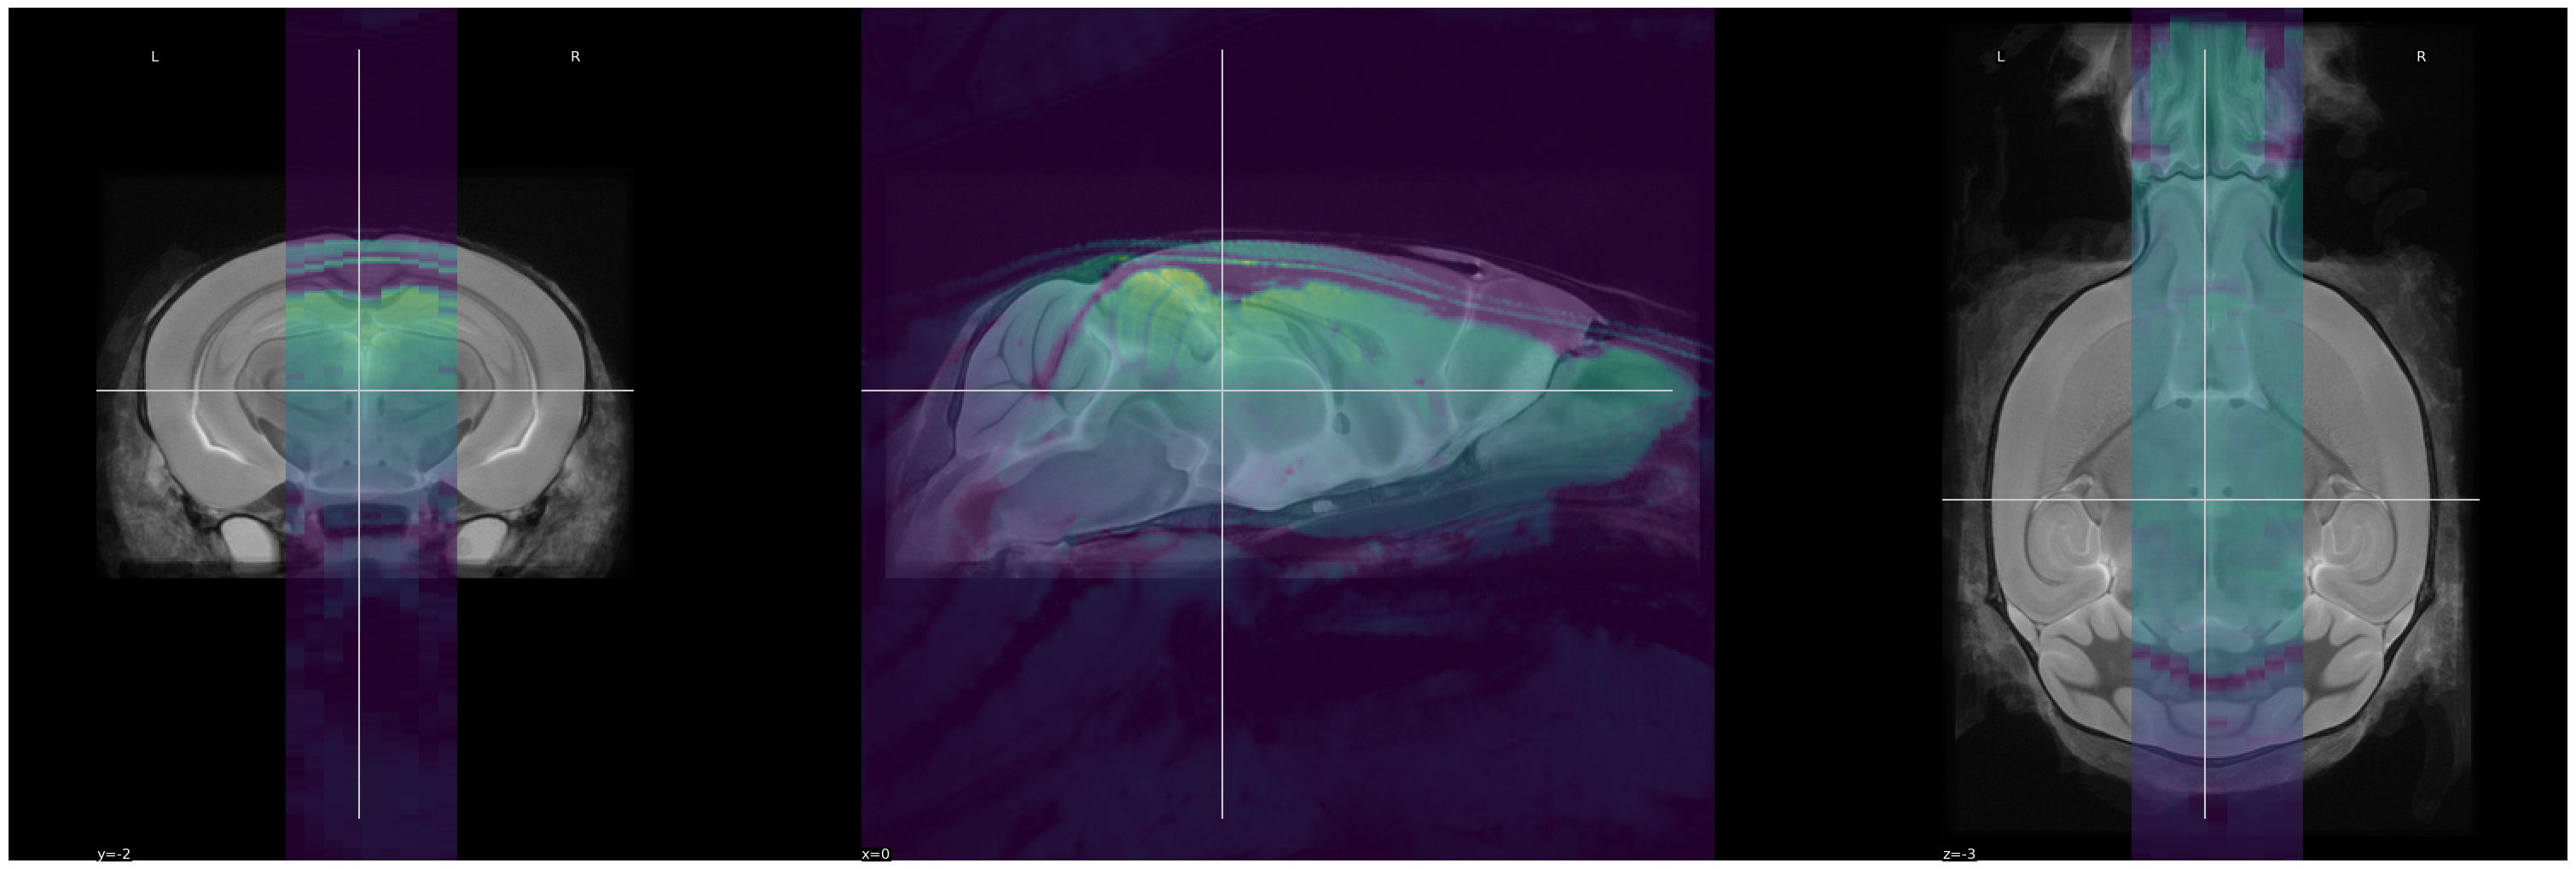

In [38]:
fig = plt.figure(figsize=(30,10))
display = plot_anat(DSURQEC40_path, display_mode='ortho', figure=fig, dim=-.5)
display.add_overlay(transform(BTBR_18_CANON_path, rotations=[0, 0, 90], translations=[10,11,-4]), alpha=0.5)